<a href="https://colab.research.google.com/github/kapibara3chi/Correspondence_Analysis/blob/main/Correspondence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install mca
!pip install matplotlib


  Preparing metadata (setup.py) ... done
  Created wheel for mca: filename=mca-1.0.3-py2.py3-none-any.whl size=6010 sha256=0ece093b82cdc607ffbab98bbc22f2ee354747e0bd7b560568d9479cc4737e2c
  Stored in directory: /root/.cache/pip/wheels/41/3c/28/32383be9777008d3318b6e787b89273ca4a6c6c915ce9bd1f3
Successfully built mca


['./ice_cream.csv', './drive', './sample_data']


<Axes: xlabel='PC1', ylabel='PC2'>

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30007 (\N{CJK UNIFIED IDEOGRAPH-7537}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: Us

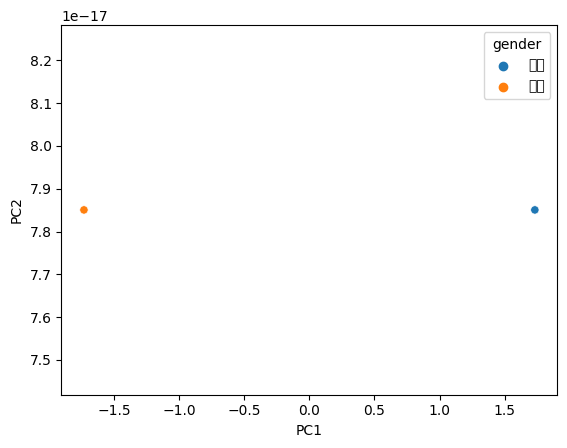

In [2]:
# 必要なライブラリをインポート
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import glob

path_list = glob.glob('./*')
print(path_list)
# csvファイルからデータセットを読み込む
df = pd.read_csv("ice_cream.csv", index_col=0)

# データセットを標準化する
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

# PCAで二次元に次元削減する
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# PCAの結果をデータフレームに変換する
df_pca = pd.DataFrame(df_pca, columns=["PC1", "PC2"])
df_pca["gender"] = df.index

# グラフにプロットする
sns.scatterplot(data=df_pca, x="PC1", y="PC2", hue="gender")

In [5]:
# ライブラリのインポート
import pandas as pd
import mca
import matplotlib.pyplot as plt

# クロス集計表の作成
data = pd.DataFrame({
    "性別": ["男", "男", "男", "女", "女", "女"],
    "趣味": ["音楽", "スポーツ", "読書", "音楽", "読書", "映画"]
})
print(data)

# df = pd.read_csv("ice_cream.csv", index_col=0)

table = pd.crosstab(data["性別"], data["趣味"])
print(table)



# 対応分析の実行
mca_counts = mca.MCA(table)
rows = mca_counts.fs_r(N=2) # 行の座標
cols = mca_counts.fs_c(N=2) # 列の座標

# 散布図の描画
print(rows)
print(cols)
plt.scatter(rows[:, 0], rows[:, 1], c="blue") # 行のプロット
plt.scatter(cols[:, 0], cols[:, 1], c="red") # 列のプロット
plt.axhline(0, color="gray") # 水平軸
plt.axvline(0, color="gray") # 垂直軸

# ラベルの付与
for label, x, y in zip(table.index, rows[:, 0], rows[:, 1]):
    plt.annotate(label, xy=(x, y), c="blue") # 行のラベル
for label, x, y in zip(table.columns, cols[:, 0], cols[:, 1]):
    plt.annotate(label, xy=(x, y), c="red") # 列のラベル

plt.show() # グラフの表示

  性別    趣味
0  男    音楽
1  男  スポーツ
2  男    読書
3  女    音楽
4  女    読書
5  女    映画
趣味  スポーツ  映画  読書  音楽
性別                  
女      0   1   1   1
男      1   0   1   1
[[ 0.11111111]
 [-0.11111111]]
[[-0.19245009]
 [ 0.19245009]
 [ 0.        ]
 [ 0.        ]]


IndexError: ignored

趣味  スポーツ  映画  読書  音楽
性別                  
女      0   0   1   1
男      2   1   0   0
[[-1.22474487]
 [ 0.81649658]]
[[ 0.81649658]
 [ 0.81649658]
 [-1.22474487]
 [-1.22474487]]


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22899 (\N{CJK UNIFIED IDEOGRAPH-5973}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12509 (\N{KATAKANA LETTER PO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12484 (\N{KATAKANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


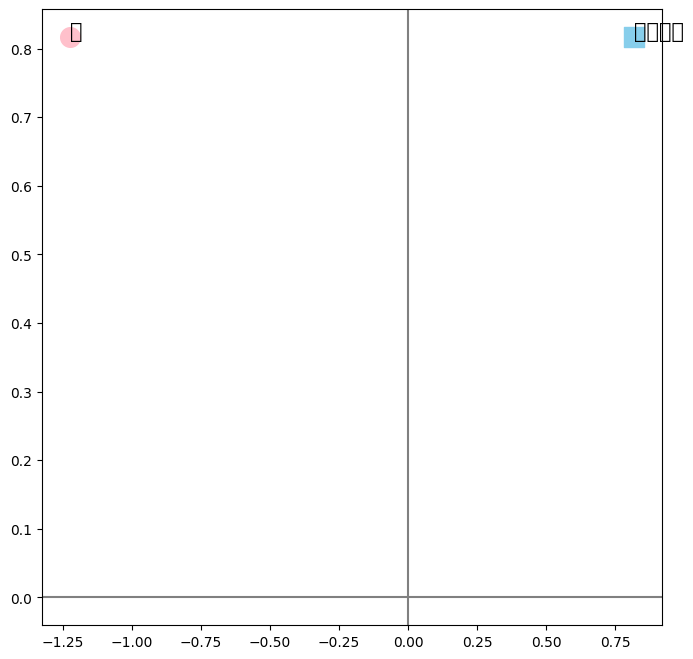

In [10]:
# ライブラリのインポート
import pandas as pd
import mca
import matplotlib.pyplot as plt

# クロス集計表の作成
df = pd.DataFrame({
    "性別": ["男", "女", "男", "女", "男"],
    "年齢": ["20代", "30代", "40代", "20代", "30代"],
    "趣味": ["スポーツ", "読書", "映画", "音楽", "スポーツ"]
})
ct = pd.crosstab(df["性別"], df["趣味"])
print(ct)

# mcaでデータを加工
mca_counts = mca.MCA(ct, benzecri=False)
rows = mca_counts.fs_r(N=2)
cols = mca_counts.fs_c(N=2)

print(rows)
print(cols)
# matplotlibでデータを可視化
fig, ax = plt.subplots(figsize=(8, 8))

# 行の処理
# ax.scatter(rows[:, 0], rows[:, 1], c="pink", marker="o", s=200)
ax.scatter(rows[0], rows[1], c="pink", marker="o", s=200)
labels = ct.index.values
# for label, x, y in zip(labels, rows[:, 0], rows[:, 1]):
for label, x, y in zip(labels, rows[0], rows[1]):
    ax.annotate(label, xy=(x, y), fontsize=15)

# 列の処理
# ax.scatter(cols[:, 0], cols[:, 1], c="skyblue", marker="s", s=200)
ax.scatter(cols[0], cols[1], c="skyblue", marker="s", s=200)
labels = ct.columns.values
# for label, x, y in zip(labels, cols[:, 0], cols[:, 1]):
for label, x, y in zip(labels, cols[0], cols[1]):
    ax.annotate(label, xy=(x, y), fontsize=15)

# 原点（0,0）を引く
ax.axhline(0, color="gray")
ax.axvline(0, color="gray")
plt.show()